[adaptado de [Programa de cursos integrados Aprendizado de máquina](https://www.coursera.org/specializations/machine-learning-introduction) de [Andrew Ng](https://www.coursera.org/instructor/andrewng)  ([Stanford University](http://online.stanford.edu/), [DeepLearning.AI](https://www.deeplearning.ai/) ) ]

# Função de Custo
<figure>
    <center> <img src="./images/C1_W1_L3_S2_Lecture_b.png"  style="width:1000px;height:200px;" ></center>
</figure>



## Objetivos
Neste laboratório, você irá:
- implementar e explorar a função `cost` para regressão linear com uma variável.

## Ferramentas
Neste laboratório, usaremos: 
- NumPy, uma biblioteca popular para computação científica
- Matplotlib, uma biblioteca popular para plotagem de dados
- rotinas locais de plotagem no arquivo lab_utils_uni.py no diretório local

In [1]:
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')
#sorted(plt.style.available)

## Definição do problema

Você gostaria de ter um modelo que pudesse prever os preços das moradias com base no tamanho da casa.  
Vamos usar os mesmos dois pontos de dados do laboratório anterior - uma casa com 1.000 pés quadrados vendida por \$300.000 e uma casa com 2.000 pés quadrados vendida por \$500.000.


| Size (1000 sqft)     | Price (1000s de dólares) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


In [3]:
x_train = np.array([1.0, 2.0])           #(tamanho em 1000s de pés quadrados)
y_train = np.array([300.0, 500.0])           #(preço 1000s de dólares)

## Calculando o custo
O termo "custo" nesta tarefa pode ser um pouco confuso, pois os dados são o custo da habitação. Aqui, o custo é uma medida de quão bem o nosso modelo está prevendo o preço-alvo da casa. O termo "preço" é usado para dados de habitação.



A equação de custo para uma variável é:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
onde
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ é a nossa predição para o exemplo $i$ usando parâmetros $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ é a diferença ao quadrado entre o valor-alvo e a previsão.   
- Essas diferenças são somadas em todos os $m$ exemplos e divididas por `2m` para produzir o custo, $J(w,b)$.  
>Nota: durante a aula teórica, os intervalos de soma são normalmente de 1 a m, enquanto aqui no laboratório será de 0 a m-1.

O código abaixo calcula o custo fazendo um loop em cada exemplo. Em cada loop:
- `f_wb`, é uma previsão calculada
- a diferença entre o alvo e a previsão é calculada e elevada ao quadrado.
- Isso é adicionado ao custo total.

In [4]:
def compute_cost(x, y, w, b): 
    """
    Calcula a função de custo para regressão linear.
    
    Args:
      x (ndarray (m,)): Dados, m exemplos
      y (ndarray (m,)): valores alvo
      w,b (scalar)    : parâmetros do modelo
    
    Returns
        total_cost (float): O custo de usar w,b como parâmetros para a regressão linear
               para ajustar os pontos de dados em x e y
    """
    # quantidade de exemplos de treino
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

## Um noção de função de custo

<img align="left" src="./images/C1_W1_Lab02_GoalOfRegression.PNG"    style=" width:380px; padding: 10px;  " /> Seu objetivo é encontrar um modelo $f_{w,b}(x) = wx + b$, com parâmetros $w,b$, que preveja com precisão os valores das casas com uma entrada $x$. O custo é uma medida da precisão do modelo nos dados de treinamento.

A equação de custo (1) acima mostra que, se $w$ e $b$ puderem ser selecionados de modo que as previsões $f_{w,b}(x)$ correspondam aos valores alvo  $y$, o termo $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ será zero e o custo será minimizado. Neste exemplo simples de dois pontos, você pode conseguir isso!

No laboratório anterior, você determinou que $b=100$ forneceu uma solução ideal, portanto, vamos definir $b$ como 100 e focar em $w$.

<br/>
Abaixo, use o controle deslizante para selecionar o valor de $w$ que minimiza o custo. Pode levar alguns segundos para que o gráfico seja atualizado.

In [5]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

O gráfico contém alguns pontos que valem a pena mencionar.
- O custo é minimizado quando $w = 200$, o que corresponde aos resultados do laboratório anterior
- Como a diferença entre o alvo e o previsto é elevada ao quadrado na equação de custo, o custo aumenta rapidamente quando $w$ é muito grande ou muito pequeno.
- Usar o `w` e o `b` selecionados pela minimização do custo resulta em uma linha que se ajusta perfeitamente aos dados.

## Visualização da função de custo - 3D

Você pode ver como o custo varia em relação a "w" e "b" plotando em 3D ou usando um gráfico de contorno.   
Vale a pena observar que alguns dos gráficos deste curso podem ser bastante complexos. As rotinas de plotagem são fornecidas e, embora possa ser instrutivo ler o código para se familiarizar com os métodos, isso não é necessário para concluir o curso com êxito. As rotinas estão em lab_utils_uni.py no diretório local.

### Conjunto de dados maior
É instrutivo visualizar um cenário com mais alguns pontos de dados. Esse conjunto de dados inclui pontos de dados que não caem na mesma linha. O que isso significa para a equação de custo? Podemos encontrar $w$ e $b$ que nos darão um custo de 0?

In [6]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

No gráfico de contorno, clique em um ponto para selecionar `w` e `b` para obter o menor custo. Use os contornos para orientar suas seleções. Observe que pode levar alguns segundos para atualizar o gráfico.

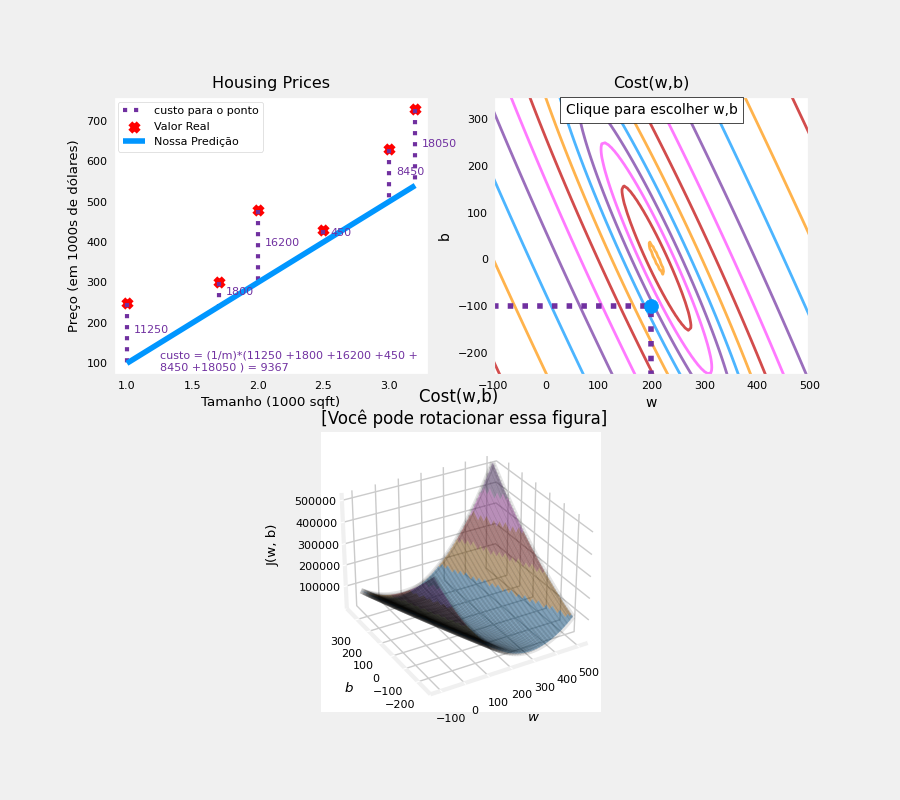

In [7]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

Acima, observe as linhas tracejadas no gráfico à esquerda. Elas representam a parte do custo contribuída por cada exemplo em seu conjunto de treinamento. Nesse caso, valores de aproximadamente $w=209$ e $b=2,4$ proporcionam um custo baixo. Observe que, como nossos exemplos de treinamento não estão em uma linha, o custo mínimo não é zero.

### Superfície de custo convexa
O fato de a função de custo elevar a perda ao quadrado garante que a "superfície de erro" seja convexa como uma tigela de sopa. Ela sempre terá um mínimo que pode ser alcançado seguindo o gradiente em todas as dimensões. No gráfico anterior, como as dimensões $w$ e $b$ são dimensionadas de forma diferente, isso não é fácil de reconhecer. O gráfico a seguir, em que $w$ e $b$ são simétricos, foi mostrado na aula:

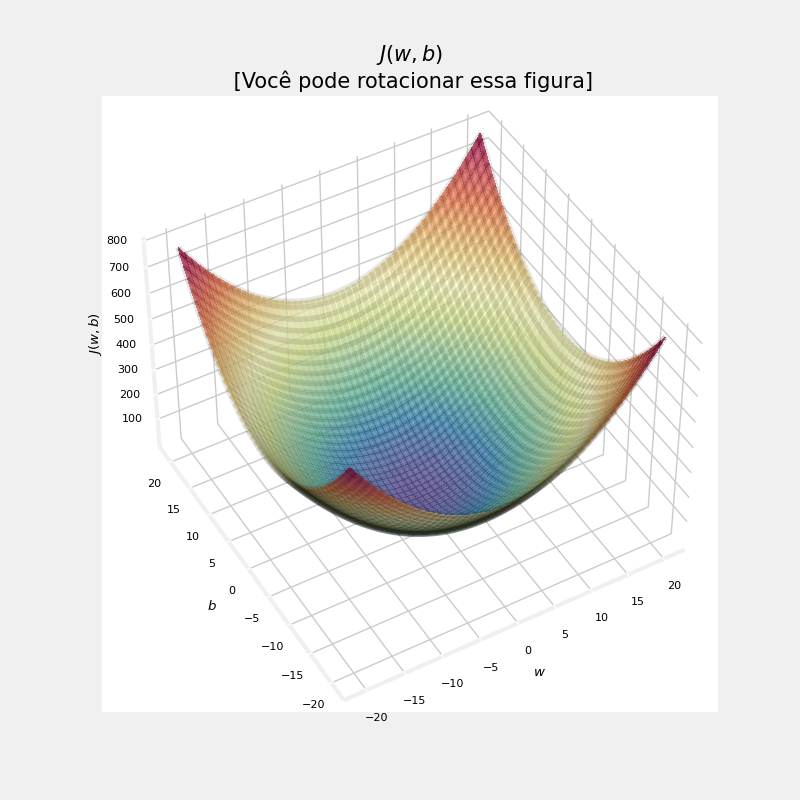

In [8]:
soup_bowl()

# Parabéns!
Você aprendeu o seguinte:
 - A equação de custo fornece uma medida de quão bem suas previsões correspondem aos dados de treinamento.
 - A minimização do custo pode fornecer valores ideais de $w$, $b$.